# Buzz Prediction on Twitter

Objective of this notebook:

- Applied the below regression models to the data:
   - KNN Regressor
   - Linear Regression
   - SVM Linear
   - Ridge Regression
   - Lasso Regression
- Used Grid Search in case the model has scaling parameter(s) to find the best scaling paramter.
- Used cross-validation to find the average training and testing score.
- Finally, Compared the results from above models and came out with the best regressor for this dataset.

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import numpy as np 
from scipy import linalg
import pylab 
import scipy.stats as stats 
from scipy.stats import boxcox
from sklearn.base import BaseEstimator, TransformerMixin
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from  sklearn.linear_model import Ridge
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.decomposition import PCA

In [10]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv('regression/Twitter/Twitter.data')

#renaming the columns
data_cols=['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6',
'ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Target']
df.columns=data_cols
df.shape

# df.head()

(583249, 78)

In [12]:
df.shape

(583249, 78)

In [13]:
df.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
count,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,...,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000,583249.000000
mean,140.339881,136.770378,159.679545,181.592402,201.097788,220.175747,219.388589,71.038172,69.829749,82.198344,...,1.136689,1.140372,140.790102,137.181502,160.106196,182.057752,201.596826,220.706276,219.937239,191.279821
std,431.772970,432.305464,502.057815,574.884157,630.448918,669.206442,672.182719,196.876865,202.199911,239.523223,...,1.432328,1.552315,432.625285,433.026946,502.774795,575.658466,631.258804,670.051490,673.033057,612.352828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091298,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583249 entries, 0 to 583248
Data columns (total 78 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   NCD_0      583249 non-null  int64  
 1   NCD_1      583249 non-null  int64  
 2   NCD_2      583249 non-null  int64  
 3   NCD_3      583249 non-null  int64  
 4   NCD_4      583249 non-null  int64  
 5   NCD_5      583249 non-null  int64  
 6   NCD_6      583249 non-null  int64  
 7   AI_0       583249 non-null  int64  
 8   AI_1       583249 non-null  int64  
 9   AI_2       583249 non-null  int64  
 10  AI_3       583249 non-null  int64  
 11  AI_4       583249 non-null  int64  
 12  AI_5       583249 non-null  int64  
 13  AI_6       583249 non-null  int64  
 14  AS(NA)_0   583249 non-null  float64
 15  AS(NA)_1   583249 non-null  float64
 16  AS(NA)_2   583249 non-null  float64
 17  AS(NA)_3   583249 non-null  float64
 18  AS(NA)_4   583249 non-null  float64
 19  AS(NA)_5   583249 non-n

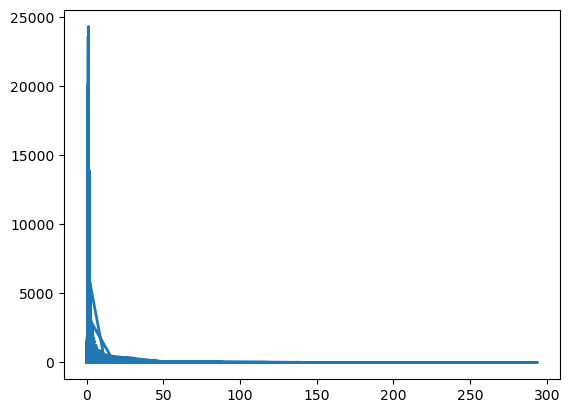

In [15]:
plt.plot(df["ADL_0"],df["NAD_0"],linewidth=2.0)
plt.show()

## Checking for Data Leakage

In [16]:
for i in range(len(df.columns.values) - 1):
    if df.iloc[:,i].corr(df.iloc[:,-1]) > 0.95:
        print(df.iloc[:,i].corr(df.iloc[:,-1]))

0.9553295810047767
0.9518090460466699
0.9552986480850786


We have checked the correlation of the target variable with the predictor variable and have seen the top 3 of them and they don't have a high correlation. Therefore none of the predictor variable is fully predicting the target varibale Buzz. Hence there is no data leakage.

(array([5.7854e+05, 3.2540e+03, 8.2100e+02, 3.3000e+02, 1.0700e+02,
        9.0000e+01, 3.6000e+01, 2.5000e+01, 1.8000e+01, 9.0000e+00,
        1.1000e+01, 5.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0.        ,  2635.96666667,  5271.93333333,  7907.9       ,
        10543.86666667, 13179.83333333, 15815.8       , 18451.76666667,
        21087.73333333, 23723.7       , 26359.66666667, 28995.63333333,
        31631.6       , 34267.56666667, 36903.53333333, 39539.5       ,
        42175.46666667, 44811.43333333, 47447.4       , 50083.36666667,
        52719.33333333, 55355.3       , 57991.26666667, 60627.23333333,
        63263.2       , 65899.16666667, 68535.13333333, 71171.1       ,
        73807.06666667, 76443.03333333, 79079.        ]),
 <BarContainer object of 30 

<Figure size 2000x2000 with 0 Axes>

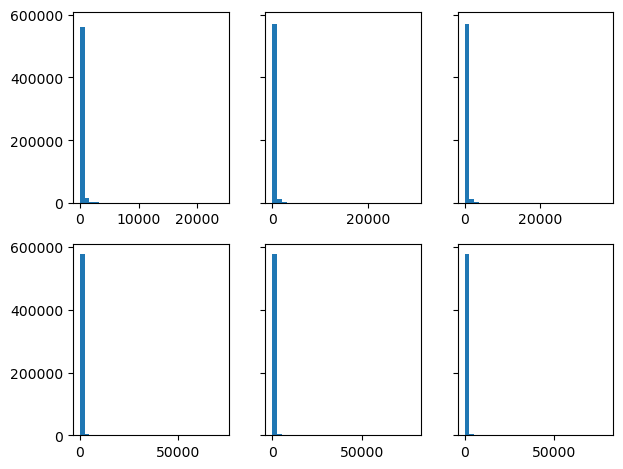

In [17]:
n_bins = 30

plt.figure(figsize=(20,20))
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)

axs[0][0].hist(df['NCD_0'], bins=n_bins)
axs[0][1].hist(df['NCD_1'], bins=n_bins)
axs[0][2].hist(df['NCD_2'], bins=n_bins)
axs[1][0].hist(df['NCD_3'], bins=n_bins)
axs[1][1].hist(df['NCD_4'], bins=n_bins)
axs[1][2].hist(df['NCD_5'], bins=n_bins)

From the above distribution we can see that some of the features doesn't have a normal distribution. Therefore we will be using a MinMax Scaler for feature scaling for both our tasks.

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

We have taken a random sample of data containing only 10% of the total observations. Considering this as the entire dataset, we are splitting the dataset into train and test.

In [19]:
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [20]:
from sklearn.model_selection import GridSearchCV

# Regression Models

## 1. KNN Regression Models

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20]}
print("Parameter grid for KNN: {}".format(param_grid))
grid_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, n_jobs = -1,return_train_score=True)

Parameter grid for KNN: {'n_neighbors': [1, 5, 10, 15, 20]}


In [22]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
             return_train_score=True)

In [23]:
cv_results = pd.DataFrame.from_dict(grid_knn.cv_results_)
cv_results[['param_n_neighbors','mean_test_score','mean_train_score']]
# cv_results['params']

,param_n_neighbors,mean_test_score,mean_train_score
0,1,0.889409,1.000000
1,5,0.897005,0.936517
2,10,0.883374,0.906147
3,15,0.876902,0.893798
4,20,0.873249,0.885134


Text(0, 0.5, 'R-square')

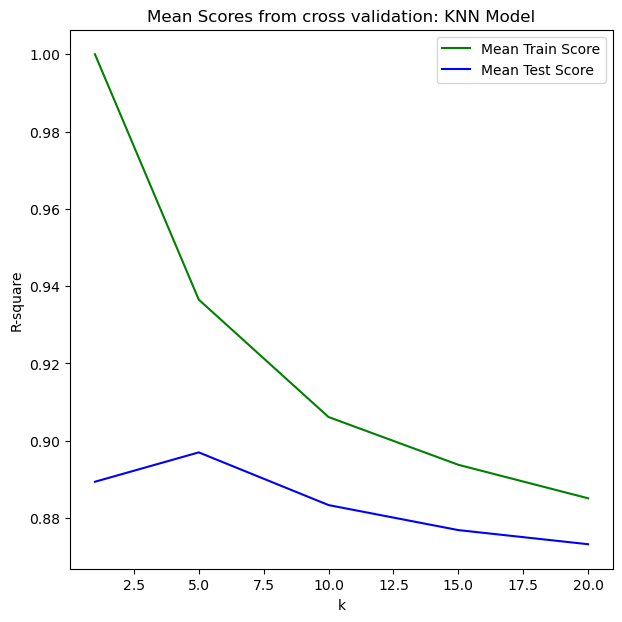

In [24]:
x_axis = cv_results['param_n_neighbors']

plt.figure(figsize=(7,7))
plt.plot(x_axis, cv_results['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, cv_results['mean_test_score'], c = 'b', label = 'Mean Test Score')
plt.legend()
plt.title('Mean Scores from cross validation: KNN Model')
plt.xlabel('k')
plt.ylabel('R-square')

From the figure we can see that 5 is the best number of neighbors. The same results we have obtained from the grid search.

In [25]:
print("Best cross-validation score: {:.4f}".format(grid_knn.best_score_))
print('Best number of neighbors:',grid_knn.best_params_)
print("Training Score: {:.4f}".format(grid_knn.score(X_train, y_train)))
print("Testing Score: {:.4f}".format(grid_knn.score(X_test, y_test)))

Best cross-validation score: 0.8970
Best number of neighbors: {'n_neighbors': 5}
Training Score: 0.9402
Testing Score: 0.9267


The above test score is for the hold out sample that was created upon train_test_split.

In [26]:
report_table = [['KNN Regressor', 'k = 5', grid_knn.score(X_train, y_train), grid_knn.score(X_test, y_test)]]

# 2. Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)

train_score = cross_val_score(lreg, X_train, y_train, cv=5)
test_score = lreg.score(X_test,y_test)

In [28]:
print("Cross-validation scores: {}".format(train_score))

Cross-validation scores: [0.95535509 0.9237054  0.96369446 0.94096874 0.95952927]


In [29]:
print("Training Score: {:.4f}".format(train_score.mean()))
print("Testing Score: {:.4f}" .format(test_score))

Training Score: 0.9487
Testing Score: 0.9570


In [30]:
report_table = report_table + [['Linear Regression', '-', train_score.mean(), test_score]]

# 3. Linear Support Vector Regression

In [31]:
from sklearn.svm import SVR

svr_linear  = SVR(kernel='linear')
parameter_grid = {'C': [0.01,0.1,1,10]}
print("Parameter grid for linear Support Vector Regression is:",parameter_grid)
linearSVR_grid = GridSearchCV(svr_linear, param_grid = parameter_grid, cv = 5, n_jobs = -1,return_train_score=True)

Parameter grid for linear Support Vector Regression is: {'C': [0.01, 0.1, 1, 10]}


In [32]:
linearSVR_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10]}, return_train_score=True)

In [33]:
cv_results = pd.DataFrame.from_dict(linearSVR_grid.cv_results_)
cv_results[['param_C','mean_train_score','mean_test_score']]

,param_C,mean_train_score,mean_test_score
0,0.01,-0.058081,-0.058643
1,0.1,0.035127,0.034875
2,1,0.603813,0.604866
3,10,0.845690,0.845966


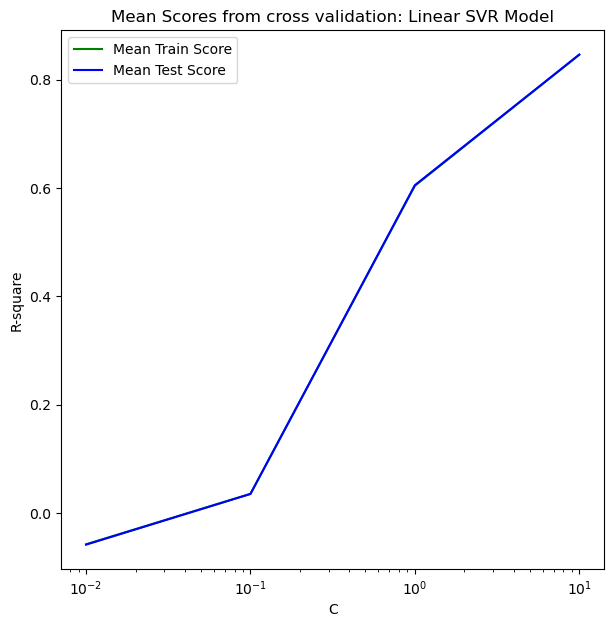

In [34]:
x_axis = cv_results['param_C']

plt.figure(figsize=(7,7))

plt.plot(x_axis, cv_results['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, cv_results['mean_test_score'], c = 'b', label = 'Mean Test Score')
plt.legend()
plt.title('Mean Scores from cross validation: Linear SVR Model')
plt.xlabel('C')
plt.ylabel('R-square')
plt.xscale('log')

In [36]:
report_table = report_table + [['SGD Regression', 'max_iter = 10000 and penalty = l2', linearSVR_grid.score(X_train, y_train), linearSVR_grid.score(X_test, y_test)]]

# 4. Lasso Regression Model

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=0)
parameter_grid = {'alpha': [0.01,0.1,1,10,100]}
print("Parameter grid for Lasso regression is:",parameter_grid)

lasso_grid = GridSearchCV(lasso,param_grid=parameter_grid,cv=5,n_jobs=-1,return_train_score=True)

Parameter grid for Lasso regression is: {'alpha': [0.01, 0.1, 1, 10, 100]}


In [38]:
lasso_grid.fit(X_train,y_train)

/opt/anaconda3/envs/cs418/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.531e+07, tolerance: 1.222e+06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/cs418/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.836e+06, tolerance: 1.299e+06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/cs418/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

GridSearchCV(cv=5, estimator=Lasso(random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [41]:
cv_results = pd.DataFrame.from_dict(lasso_grid.cv_results_)
cv_results[['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.01,0.953054,0.948243
1,0.1,0.948946,0.945321
2,1,0.932005,0.928094
3,10,0.534687,0.537543
4,100,0.000000,-0.000007


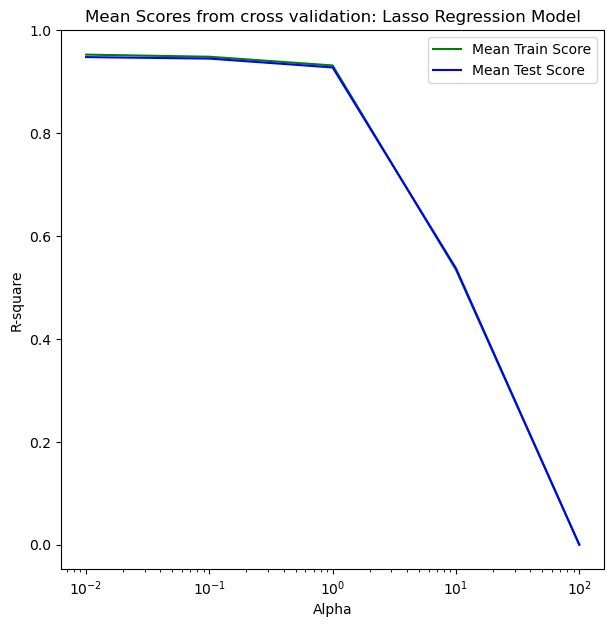

In [42]:
#Plotting the test and train score
x_axis = cv_results['param_alpha']

plt.figure(figsize=(7,7))
plt.plot(x_axis, cv_results['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, cv_results['mean_test_score'], c = 'b', label = 'Mean Test Score')
plt.legend()
plt.title('Mean Scores from cross validation: Lasso Regression Model')
plt.xlabel('Alpha')
plt.ylabel('R-square')
plt.xscale('log')

In [43]:
print("Best cross-validation score: {:.4f}".format(lasso_grid.best_score_))
print('Best alpha:',lasso_grid.best_params_)
print("Training Score: {:.4f}".format(lasso_grid.score(X_train, y_train)))
print("Testing Score: {:.4f}".format(lasso_grid.score(X_test, y_test)))

Best cross-validation score: 0.9482
Best alpha: {'alpha': 0.01}
Training Score: 0.9527
Testing Score: 0.9561


In [44]:
report_table = report_table + [['Lasso Regression', 'alpha = 0.01', lasso_grid.score(X_train, y_train), lasso_grid.score(X_test, y_test)]]

# 5. Ridge Regression model

In [45]:
from  sklearn.linear_model import Ridge

ridge = Ridge(random_state = 0)
parameter_grid = {'alpha': [0.01,0.1,1,10,100]}
print("Parameter grid for Lasso regression is:",parameter_grid)

ridge_grid = GridSearchCV(ridge,param_grid=parameter_grid,cv=5,n_jobs=-1,return_train_score=True)

Parameter grid for Lasso regression is: {'alpha': [0.01, 0.1, 1, 10, 100]}


In [46]:
ridge_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [47]:
cv_results = pd.DataFrame.from_dict(ridge_grid.cv_results_)
cv_results[['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.01,0.954340,0.948851
1,0.1,0.953340,0.948420
2,1,0.948649,0.944142
3,10,0.927952,0.924060
4,100,0.879737,0.878026


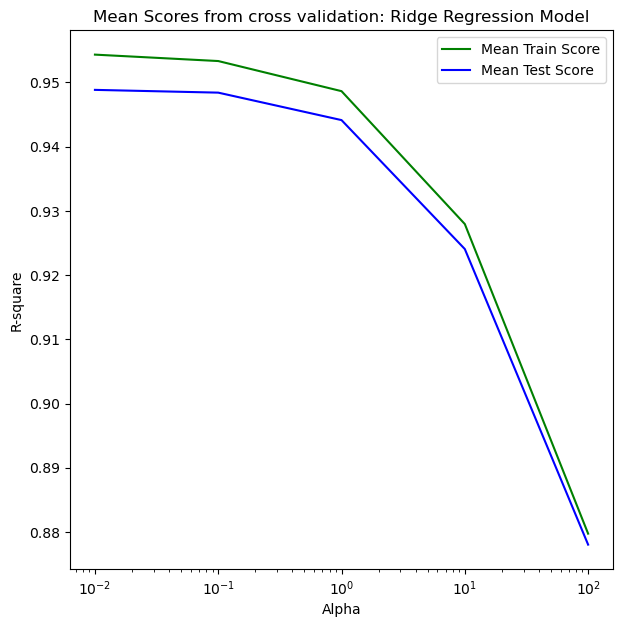

In [48]:
#Plotting the test and train score
x_axis = cv_results['param_alpha']

plt.figure(figsize=(7,7))
plt.plot(x_axis, cv_results['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, cv_results['mean_test_score'], c = 'b', label = 'Mean Test Score')
plt.legend()
plt.title('Mean Scores from cross validation: Ridge Regression Model')
plt.xlabel('Alpha')
plt.ylabel('R-square')
plt.xscale('log')

In [49]:
print("Best cross-validation score: {:.4f}".format(ridge_grid.best_score_))
print('Best alpha:',ridge_grid.best_params_)
print("Training Score: {:.4f}".format(ridge_grid.score(X_train, y_train)))
print("Testing Score: {:.4f}".format(ridge_grid.score(X_test, y_test)))

Best cross-validation score: 0.9489
Best alpha: {'alpha': 0.01}
Training Score: 0.9540
Testing Score: 0.9569


In [51]:
report_table = report_table + [['Ridge Regression','alpha = 0.01', ridge_grid.score(X_train, y_train), ridge_grid.score(X_test, y_test)]]

In [53]:
report_table

[['KNN Regressor', 'k = 5', 0.9401931975841876, 0.9267018499620625],
 ['Linear Regression', '-', 0.9486505928791769, 0.9569704568840212],
 ['SGD Regression',
  'max_iter = 10000 and penalty = l2',
  0.8532604882287029,
  0.8509134837259038],
 ['Lasso Regression', 'alpha = 0.01', 0.9527021776931954, 0.9561251569483203],
 ['Ridge Regression', 'alpha = 0.01', 0.954021008767915, 0.9568770420054323]]

In [54]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy'])

In [56]:
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy,Test accuracy
Model name,,,,
KNN Regressor,KNN Regressor,k = 5,0.940193,0.926702
Linear Regression,Linear Regression,-,0.948651,0.956970
SGD Regression,SGD Regression,max_iter = 10000 and penalty = l2,0.853260,0.850913
Lasso Regression,Lasso Regression,alpha = 0.01,0.952702,0.956125
Ridge Regression,Ridge Regression,alpha = 0.01,0.954021,0.956877


Out of all the above models, Linear regression and Ridge Regression have approximately equal test accuracy of 0.956. But ridge regression has the highest accuracy on train. Hence, we have ran the Ridge regression with alpha = 0.01 on the entire dataset. 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train_whole_scale = scaler.fit_transform(X_train_whole)
X_test_whole_scale = scaler.transform(X_test_whole)

ridge = Ridge(alpha = 0.01)
ridge.fit(X_train_whole_scale,y_train_whole)

Ridge(alpha=0.01)

In [58]:
print("Training Score of the best model: {:.4f}".format(ridge.score(X_train_whole_scale, y_train_whole)))
print("Testing Score of the best model: {:.4f}".format(ridge.score(X_test_whole_scale, y_test_whole)))

Training Score of the best model: 0.9419
Testing Score of the best model: 0.9153


In [59]:
y_predict = ridge.predict(X_test_whole_scale)

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test_whole, y_predict)

0.9152767383999456

## Ridge Regression is the best regression best for this dataset !!!